In [1]:
import math
import os
import re
import altair as alt
import numpy as np
import pandas as pd
import scipy.stats
import yaml
import neutcurve
import scipy.stats
print(f"Using `neutcurve` version {neutcurve.__version__}")
import sys
import matplotlib.pyplot as plt

# allow more rows for Altair
_ = alt.data_transformers.disable_max_rows()

#import altair themes from /data/custom_analyses_data/theme.py and enable
import theme
alt.themes.register('main_theme', theme.main_theme)
alt.themes.enable('main_theme')
os.chdir('/fh/fast/bloom_j/computational_notebooks/tmcmahon/2024/02_RSV/RSV_evolution_neut') #sets working directory to repo/project root folder
plt.rcParams['svg.fonttype'] = 'none' #from bernadeta, for correct font svg output

Using `neutcurve` version 2.1.0


In [3]:
#warnings.simplefilter('ignore')
#theme_set(theme_seaborn(style='white', context='talk', font_scale=1))

In [4]:
import os
print(os.getcwd())

/fh/fast/bloom_j/computational_notebooks/tmcmahon/2024/02_RSV/RSV_evolution_neut


## for the paper we want
- N201S H Nirsv
- B1982 H pooled sera 

In [5]:
df = pd.read_csv('01_data/frac_infect/250130_fractinfect_v_dilutions_corrected.csv')
df.head()

,serum,virus,replicate,concentration,well_id,plate_name,experiment_rep,fraction infectivity,input_folder,Unnamed: 9
0,Nirsevimab,N201S H Neat,1,1000.000000,NaN,N4,virus dilution,0.332067,25.01.30,0.332067
1,Nirsevimab,N201S H Neat,1,285.714286,NaN,N4,virus dilution,0.565338,25.01.30,0.565338
2,Nirsevimab,N201S H Neat,1,81.632653,NaN,N4,virus dilution,1.053753,25.01.30,1.053753
3,Nirsevimab,N201S H Neat,1,23.323615,NaN,N4,virus dilution,1.081557,25.01.30,1.081557
4,Nirsevimab,N201S H Neat,1,6.663890,NaN,N4,virus dilution,0.886469,25.01.30,0.886469


In [6]:
fits = neutcurve.curvefits.CurveFits(
            data=df,
            fixbottom=0,
            #max_viruses_per_subplot=11
            )


In [7]:
fits.fitParams().to_csv("03_output/processed_data/250130_VirusDilution_IC50s.csv")

In [8]:
# Create separate DataFrames for each subset
#Nirsevimab_N201S_L = df[(df['serum'] == "Nirsevimab") & (df['virus'].str.contains("N201S L", na=False))]
Nirsevimab_N201S_H = df[(df['serum'] == "Nirsevimab") & (df['virus'].str.contains("N201S H", na=False))]
#PooledSera_N201S_L = df[(df['serum'] == "Pooled Sera") & (df['virus'].str.contains("N201S L", na=False))]
#PooledSera_N201S_H = df[(df['serum'] == "Pooled Sera") & (df['virus'].str.contains("N201S H", na=False))]
#Nirsevimab_B1982_L = df[(df['serum'] == "Nirsevimab") & (df['virus'].str.contains("B1982 L", na=False))]
#Nirsevimab_B1982_H = df[(df['serum'] == "Nirsevimab") & (df['virus'].str.contains("B1982 H", na=False))]
#PooledSera_B1982_L = df[(df['serum'] == "Pooled Sera") & (df['virus'].str.contains("B1982 L", na=False))]
PooledSera_B1982_H = df[(df['serum'] == "Pooled Sera") & (df['virus'].str.contains("B1982 H", na=False))]

# Display a preview of each subset
for subset in [
    Nirsevimab_N201S_H, PooledSera_B1982_H
]:
    display(subset.head())  # Use in Jupyter Notebook for proper formatting


,serum,virus,replicate,concentration,well_id,plate_name,experiment_rep,fraction infectivity,input_folder,Unnamed: 9
0,Nirsevimab,N201S H Neat,1,1000.000000,NaN,N4,virus dilution,0.332067,25.01.30,0.332067
1,Nirsevimab,N201S H Neat,1,285.714286,NaN,N4,virus dilution,0.565338,25.01.30,0.565338
2,Nirsevimab,N201S H Neat,1,81.632653,NaN,N4,virus dilution,1.053753,25.01.30,1.053753
3,Nirsevimab,N201S H Neat,1,23.323615,NaN,N4,virus dilution,1.081557,25.01.30,1.081557
4,Nirsevimab,N201S H Neat,1,6.663890,NaN,N4,virus dilution,0.886469,25.01.30,0.886469


,serum,virus,replicate,concentration,well_id,plate_name,experiment_rep,fraction infectivity,input_folder,Unnamed: 9
54,Pooled Sera,B1982 H Neat,1,0.010000,NaN,P5,virus dilution,0.018478,25.01.30,NaN
55,Pooled Sera,B1982 H Neat,1,0.003333,NaN,P5,virus dilution,0.161634,25.01.30,NaN
56,Pooled Sera,B1982 H Neat,1,0.001111,NaN,P5,virus dilution,0.459772,25.01.30,NaN
57,Pooled Sera,B1982 H Neat,1,0.000370,NaN,P5,virus dilution,0.826614,25.01.30,NaN
58,Pooled Sera,B1982 H Neat,1,0.000123,NaN,P5,virus dilution,0.997469,25.01.30,NaN


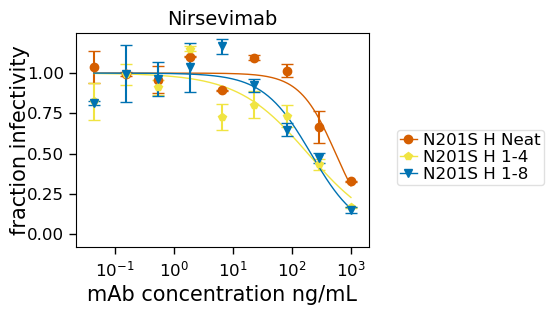

In [9]:
fits = neutcurve.curvefits.CurveFits(
            data=Nirsevimab_N201S_H,
            fixbottom=0,
            #max_viruses_per_subplot=11
            )

fig,axes = fits.plotSera(
            xlabel='mAb concentration ng/mL', max_viruses_per_subplot=11, colors = ['#D55E00', '#F0E442',
                                                                                    '#0072B2','#CC79A7', 
                                                                                    '#808080',  
                                                                                    '#999999',
                                                                                    '#D55E00','#E69F00', '#F0E442',
                                                                                    '#762A83','#CC79A7','#0072B2','#56B4E9','#009E73', 
                                                                                    '#1B7837', '#000000', 
                                                                                    '#999999'], 
            markers = ['o', 'p', 'v', 's', 'o', '^', 'D', 's', 'v', '8', 's'],
            draw_in_bounds=True, ncol=3, sharex=False
)
fig.savefig('03_output/plots/250130_VirusDilution_NirsN201S-H.svg', dpi=100, bbox_inches='tight')


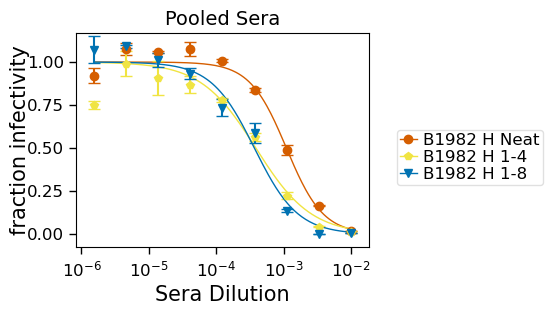

In [10]:
fits = neutcurve.curvefits.CurveFits(
            data=PooledSera_B1982_H,
            fixbottom=0,
            #max_viruses_per_subplot=11
            )

fig,axes = fits.plotSera(
            xlabel='Sera Dilution', max_viruses_per_subplot=11, colors = ['#D55E00', '#F0E442',
                                                                                    '#0072B2','#CC79A7', 
                                                                                    '#808080',  
                                                                                    '#999999',
                                                                                    '#D55E00','#E69F00', '#F0E442',
                                                                                    '#762A83','#CC79A7','#0072B2','#56B4E9','#009E73', 
                                                                                    '#1B7837', '#000000', 
                                                                                    '#999999'], 
            markers = ['o', 'p', 'v', 's', 'o', '^', 'D', 's', 'v', '8', 's'],
            draw_in_bounds=True, ncol=3, sharex=False
)
fig.savefig('03_output/plots/250130_VirusDilution_PoolB82_H.svg', dpi=100, bbox_inches='tight')
